# Inhaltsverzeichnis 

- **Lineare Regression Aufgaben**
    - **Aufgabe 1 - Imports**
    - **Aufgabe 2 - Daten verstehen**
    - **Aufgabe 3 - Daten in Pandas**
    - **Aufgabe 4 - Datenvisualisierung**
    - **Aufgabe 5 - Daten aufteilen**
    - **Aufgabe 6 - Modell trainieren**
    - **Aufgabe 6 - Modell testen**
    - **Aufgabe 7 - Model visualisieren**


# Lineare Regression Aufgaben

## Aufgabe 1 - Imports

- Importiere `numpy` und `pandas`.
- Importiere `seaborn` und `matplotlib.pyplot`.
- Importiere von `sklearn` das Module `datasets`
- Importiere aus dem Model `sklearn.linear_model` das Modell [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- Importiere aus dem Model `sklearn.model_selection` die Funktionen  [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) und [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- Importiere aus dem Model `sklearn.metrics` die Funktionen [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) und [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- Lies den Datensatz `diabetes` mit `datasets.load_diabetes()` ein.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

diabetes = datasets.load_diabetes()

## Aufgabe 2 - Daten verstehen

- Gib die Schlüssel des Datensatzes auf der Konsole aus.
- Gib die Beschreibung `DESCR` des Datensatzes auf der Konsole aus.
- Was sind die Daten und was ist der Target des Datensatzes?
- Gib das Shape des Datensatzes auf der Konsole aus.
- Gib die Features `feature_names` des Datensatzes auf der Konsole aus.

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
daten = diabetes.data
daten

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
target = diabetes.target
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
diabetes.data.shape

(442, 10)

In [7]:
feature_names = diabetes.feature_names
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Aufgabe 3 - Daten in Pandas

- Erstelle ein Data Frame `df`, mit den Daten `data` und den Spaltennamen `feature_names` aus dem Datensatz.
- Füge die Spalte `target` am Ende des DataFrames mit den Daten `target` aus dem Datensatz hinzu.

In [8]:
df = pd.DataFrame(data = daten, columns = feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
df["target"] = target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Aufgabe 4 - Datenvisualisierung

- Erstelle ein `heatmap` mit Seaborn für die Korrelationswerte des Datensatzes. 
    - Benutze hierfür die Funktionen `heatmap` aus `seaborn` und 
    - `corr()` des Pandas-Dataframes
- Runde die Korrelationswerte auf 2 Nachkommastellen. Der Befehl `df.corr().round(2)` ist hier von Nutzen.
- Welches Feature hat die höchste positive oder negative Korrelation zum Target?

Wir entscheiden uns für das Feature mit der höchsten Korrelation und arbeiten jetzt nur mit diesem Feature.

- Speichere die Daten dieses Feature im Numpy Array `X_data`.
- Speichere die Daten des Targets im Numpy Array `y_data`.
- Erstelle ein `scatter`-Plot, in welchem die Punkte aus `X_data` gegen die Punkte aus `y_data` aufgetragen werden

> <span style="color:red"> **_WICHTIG:_** </span> Vergewissere dich (mittels `type`), dass `X_data` und `y_data` *wirklich* Numpy Arrays sind! Für die weiteren Zellen wollen wir *keine* Dataframes benutzen!

In [10]:
corr = df.corr().round(2)
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


<Axes: >

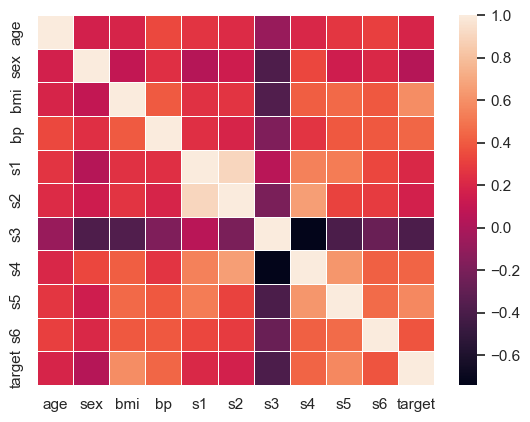

In [11]:
sns.heatmap(corr, linewidths = .5)

In [12]:
X_data = df["bmi"].values.reshape(-1,1)
print(type(X_data))

<class 'numpy.ndarray'>


In [13]:
y_data = df["target"].values.reshape(-1,1)
print(type(y_data))

<class 'numpy.ndarray'>


Text(0, 0.5, 'target')

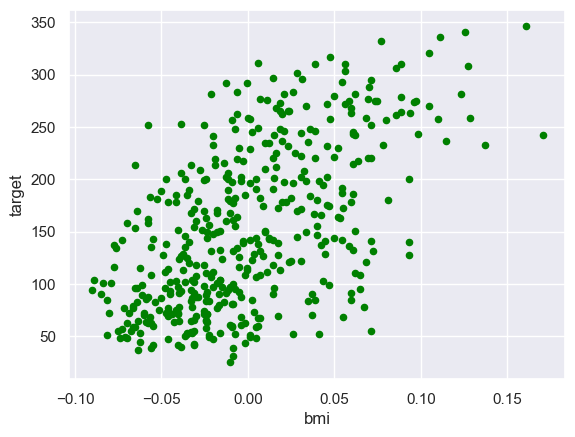

In [14]:
plt.scatter(X_data, y_data, color = "green", s = 20)
plt.xlabel('bmi')
plt.ylabel('target')

## Aufgabe 5 - Daten aufteilen

- Gib die Shape von `X_data` und `y_data` auf der Konsole aus.
- Wandle die Arrays zu einem 2D Array mit shape `(442,1)`.
- Teile die Daten mit der Funktion `train_test_split` in `X_train, X_test, y_train, y_test` auf.
- Dabei sollen die Trainingsdaten 80% der urprünglichen Daten ausmachen. 
- Benutze den `random_state` von 20 bei der Aufteilung.
- Gib die Dimensionen für alle 6 Variablen auf der Konsole aus.

In [15]:
print(X_data.shape)
print(y_data.shape)

(442, 1)
(442, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 20)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 1)
(89, 1)
(353, 1)
(89, 1)


## Aufgabe 6 - Modell trainieren

- Erstelle ein Modell der Klasse `LinearRegression`.
- Trainiere das Modell anhand der Trainingsdaten `X_train` und `y_train`.

Jetzt wollen wir den RMSE und den R2 score für die Trainingsdaten finden, damit wir die als Baselinewerte für unser Modell nutzen. Mit anderen Worten, trainieren wir das Modell mit `X_train` und fragen dann genau diese Werte nach. 
- Nutze die Methode `predict` des Regressionsmodells auf die Trainingsdaten `X_train` und speichere die ausgegebene Labels in `y_pred_train`.
- Berechne die **Wurzel** des MSE zwischen den wahren Labels `y_train` und den vorhergesagten aus `predict` und speichere das Ergebnis in der Variable `rmse`.
- Berechne den R2 Score zwischen den wahren Labels `y_train` und den vorhergesagten aus `predict`.

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

y_pred_train = lr.predict(X_train)

rmse = metrics.mean_squared_error(y_train, y_pred_train)
r2 = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 3708.9514912083796
R2 score is 60.90116165729829




## Aufgabe 6 - Modell testen



Jetzt wollen wir, wie in einem realistischen ML Ansatz, für Testdaten, die das trainierte Modells nie gesehen hat, Labels generieren.  
- Nutze `predict` für die Testdaten `X_test` und speichere die Labels in `y_pred_test`.
- Berechne die **Wurzel** des MSE zwischen den wahren Labels `y_test`und den vorhergesagten `y_pred_test` und speichere das Ergebnis in der Variable `rmse`.
- Berechne den R2 Score zwischen den wahren Labels `y_test` und den vorhergesagten aus `predict`.


In [19]:
y_pred_test = lr.predict(X_test)

rmse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 4648.2192641244
R2 score is 68.1778502456949




## Aufgabe 7 - Model visualisieren

- Erstelle ein `scatter` Plot blauen Punkte für `X_train` und `y_train`.
- Erstelle ein `scatter` Plot mit grünen Punkte für `X_test` und `y_test`.
- Plotte dazu noch die rote Regressionsgerade für `X_test` und `y_pred_test`. 

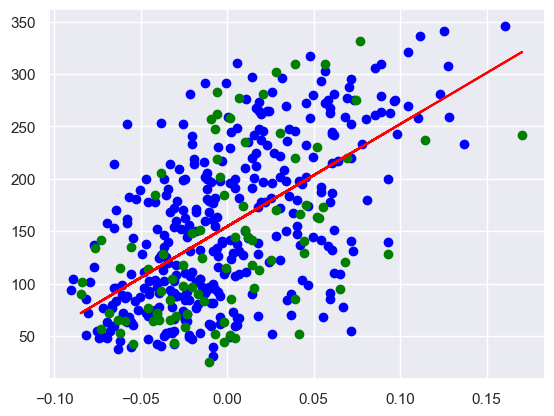

In [20]:
plt.scatter(X_train, y_train, color = "blue")
plt.scatter(X_test, y_test, color = "green")
plt.plot(X_test, y_pred_test, color = "red")